In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
#for training first 1000
#for testing last 209


train_data=data[:1000]
train_target=target[:1000]

test_data=data[1000:]
test_target=target[1000:]

print(train_data.shape)
print(test_data.shape)

(1000, 50, 1)
(209, 50, 1)


In [3]:
print(train_target.shape)

(1000, 1)


In [4]:
print(test_target.shape)

(209, 1)


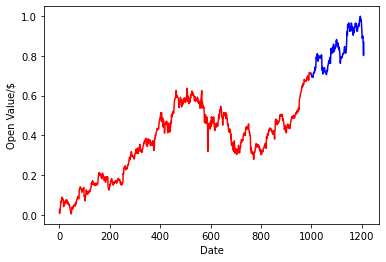

In [5]:
from matplotlib import pyplot as plt

test_x_range=np.arange(1000,1209,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [6]:
!pip install tensorflow --upgrade --user

Requirement already up-to-date: tensorflow in c:\users\udara vimukthi\anaconda3\lib\site-packages (2.5.0)


In [7]:
!pip install keras --upgrade --user

Requirement already up-to-date: keras in c:\users\udara vimukthi\appdata\roaming\python\python38\site-packages (2.4.3)


In [8]:
from tensorflow  import keras
#from tensorflow.python.keras.utils import np_utils

In [9]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

In [10]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

model=Sequential()

model.add(LSTM(units=96,return_sequences=True,input_shape=(data.shape[1:])))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='linear'))

model.compile(loss='mse',optimizer='adam')

In [11]:
history=model.fit(train_data,train_target,epochs=200,validation_split=0.1)

Epoch 1/200
29/29 [==============================] - 10s 135ms/step - loss: 0.0171 - val_loss: 0.0092
Epoch 2/200
29/29 [==============================] - 2s 83ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 3/200
29/29 [==============================] - 2s 83ms/step - loss: 0.0025 - val_loss: 0.0044
Epoch 4/200
29/29 [==============================] - 3s 117ms/step - loss: 0.0022 - val_loss: 0.0067
Epoch 5/200
29/29 [==============================] - 3s 87ms/step - loss: 0.0025 - val_loss: 0.0027
Epoch 6/200
29/29 [==============================] - 3s 110ms/step - loss: 0.0025 - val_loss: 0.0055
Epoch 7/200
29/29 [==============================] - 3s 106ms/step - loss: 0.0027 - val_loss: 0.0041
Epoch 8/200
29/29 [==============================] - 3s 106ms/step - loss: 0.0019 - val_loss: 0.0043
Epoch 9/200
29/29 [==============================] - 3s 105ms/step - loss: 0.0019 - val_loss: 0.0037
Epoch 10/200
29/29 [==============================] - 3s 106ms/step - loss: 0.0019 - val_loss

29/29 [==============================] - 3s 104ms/step - loss: 6.8323e-04 - val_loss: 1.4137e-04
Epoch 79/200
29/29 [==============================] - 3s 109ms/step - loss: 8.5178e-04 - val_loss: 3.9089e-04
Epoch 80/200
29/29 [==============================] - 3s 110ms/step - loss: 9.6028e-04 - val_loss: 1.4246e-04
Epoch 81/200
29/29 [==============================] - 3s 103ms/step - loss: 7.1611e-04 - val_loss: 5.9876e-04
Epoch 82/200
29/29 [==============================] - 3s 104ms/step - loss: 6.9393e-04 - val_loss: 3.5380e-04
Epoch 83/200
29/29 [==============================] - 3s 103ms/step - loss: 6.8655e-04 - val_loss: 1.7964e-04
Epoch 84/200
29/29 [==============================] - 3s 103ms/step - loss: 6.3852e-04 - val_loss: 0.0012
Epoch 85/200
29/29 [==============================] - 3s 103ms/step - loss: 6.1639e-04 - val_loss: 0.0014
Epoch 86/200
29/29 [==============================] - 3s 103ms/step - loss: 6.7716e-04 - val_loss: 2.8768e-04
Epoch 87/200
29/29 [===========

29/29 [==============================] - 3s 121ms/step - loss: 5.2153e-04 - val_loss: 4.0160e-04
Epoch 153/200
29/29 [==============================] - 3s 114ms/step - loss: 4.4730e-04 - val_loss: 8.7108e-05
Epoch 154/200
29/29 [==============================] - 3s 108ms/step - loss: 4.0686e-04 - val_loss: 3.7754e-04
Epoch 155/200
29/29 [==============================] - 3s 109ms/step - loss: 4.8484e-04 - val_loss: 1.8953e-04
Epoch 156/200
29/29 [==============================] - 3s 108ms/step - loss: 4.9059e-04 - val_loss: 2.1040e-04
Epoch 157/200
29/29 [==============================] - 3s 112ms/step - loss: 5.6986e-04 - val_loss: 1.6653e-04
Epoch 158/200
29/29 [==============================] - 4s 138ms/step - loss: 4.5593e-04 - val_loss: 0.0011
Epoch 159/200
29/29 [==============================] - 4s 130ms/step - loss: 6.4388e-04 - val_loss: 9.4711e-04
Epoch 160/200
29/29 [==============================] - 4s 144ms/step - loss: 7.0369e-04 - val_loss: 8.5189e-05
Epoch 161/200
29/29

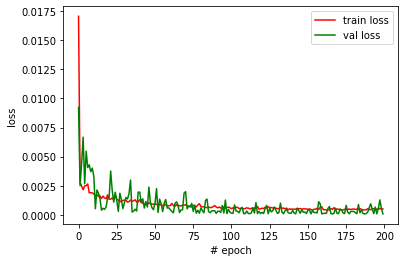

In [12]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [13]:
result=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result)
print('r2 score:',r2)

r2 score: 0.9503084218478335


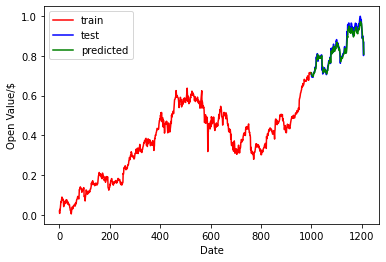

In [14]:
test_x_range=np.arange(1000,1209,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.plot(test_x_range,result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

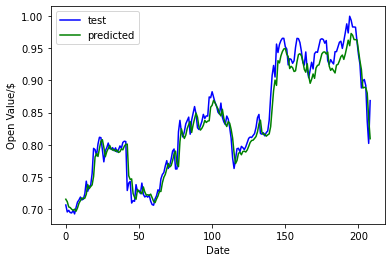

In [15]:
plt.plot(test_target,'b',label='test')
plt.plot(result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()